### Max Ranieri - CSC370

In this Jupyter notebook I used numpy, scipy, and matplotlib to adapt some Matlab code that explores convolution in 1D and 2D. Ideally I would have done more but I am still learning numpy so adapting the code took some work.

[Original code/exercises](http://www.cs.smith.edu/~nhowe/teaching/csc370/Assign/conv.html).

In [36]:
%matplotlib inline

import numpy as np
import matplotlib
from scipy import signal
from PIL import Image

from matplotlib import pyplot as plt

see [here](https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python) for gaussian function source

In [37]:
# function adapted from matlab by ali_m on stack overflow
def gaussian(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

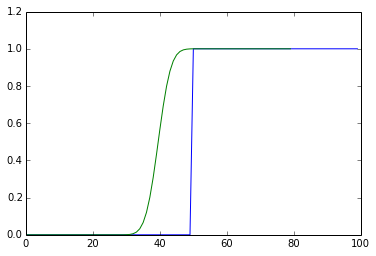

In [38]:
# 1D functions
a = np.append(np.zeros((1,50)),np.ones((1,50)))
b = np.concatenate((np.zeros((1,100))[0], np.array([1]), np.zeros((1,100))[0]))
c = np.concatenate((np.zeros((1,50))[0], np.linspace(0,1,50), np.linspace(0,1,50), np.ones((1,50))[0]))
d = np.concatenate((np.zeros((1,50))[0], np.linspace(0,1,50), np.zeros((1,50))[0]))

f = gaussian((1,21), 3)
f = f[0]
g = [-1, 1]

plt.plot(a)
plt.plot(np.convolve(a,f,'valid'))
plt.show()

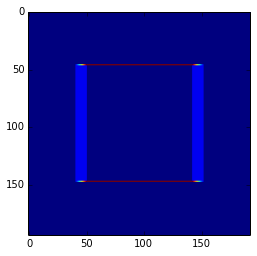

In [67]:
# 2D functions
# padding works a bit differently in numpy than matlab, so I tried to
# approximate what I determined each plot to be based on the Matlab code provided
a2 = np.concatenate((np.zeros((200,100)), np.ones((200,100))))
arr = [[0, 1], [0, 0]]
b2 = np.pad(arr, ((98,100),(100,100)), 'constant')
c2 = np.pad(np.ones((1,100)), ((100,100),(100,100)), 'constant')
d2 = np.pad(np.ones((100,100)), ((75,75),(75,75)), 'constant')
e2 = np.pad(np.pad(np.zeros((100,100)),((1,1), (1,1)), 'constant', constant_values=1), ((50,50), (50,50)), 'constant')

f2 = gaussian((21,21), 3)
g2 = [1, -1]
g2 = np.expand_dims(g2, 0)
h2 = np.transpose(g2)

up1 = [[0, 1, 0], 
       [0,0,0], 
       [0,0,0]]
dbl = [[1,0,0,0,0], 
       [0,0,0,0,0], 
       [0,0,1,0,0], 
       [0,0,0,0,0], 
       [0,0,0,0,0]]

blur = np.concatenate((np.zeros((4, 10)), np.ones((1,10)), np.zeros((4,10))))/10

plt.imshow(signal.convolve2d(e2, blur ,'valid'))
plt.show()

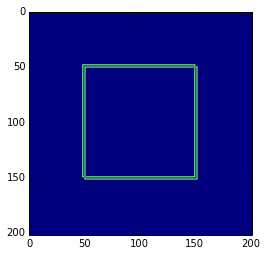

In [91]:
# Convolution function
# Expects a square kernel
def myconv2d(img, kern):
    img_data = img_to_arr(img)
    nrow = img_data.shape[0]
    ncol = img_data.shape[1]
    img2 = np.zeros((nrow,ncol))
    d = len(kern)
    r = d/2
    for i in range((r-1), (nrow-d)):
        for j in range((r-1), (ncol-d)):
            img2[i, j] = (kern*img[i:i+d,j:j+d]).sum()
    return img2
    
def img_to_arr(img) :
    data = np.asarray(img, dtype="int32")
    return data

none = [[1,1,1], [1,1,1], [1,1,1]]

plt.imshow(myconv2d(e2,dbl))
plt.show()